# Data Analysis - Lab 6
### M. Sébastien MASCHA & M. Pierre SAUVAGE
### ISEP Paris   |   2019-2020
<br/>
<br/>

___

# Exercice A - Stationnarity analysis
*Overview of the concept of stationarity*

### Import of libraries

This document has been done using python on Jupyter Notebook with the librairies:

- maths for sqrt, pi, exp
- Numpy to manipulate arrays
- pandas to import csv
- matplotlib to plot graphics
- seaborn to make your charts prettier (built on top of Matplotlib)
- sklearn : tools for data mining and data analysis
- SciPy : a Python-based ecosystem of open-source software for mathematics, science, and engineering. 

In [11]:
# coding: utf-8

import data

from math import sqrt,pi,exp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

import scipy
from scipy import stats

import statsmodels
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.stats.diagnostic import acorr_ljungbox

<br/>
<br/>

___
### Question 1 - Load the USeconomic dataset

In [12]:
df = pd.read_csv("data/USeconomics.csv", sep =',')

print("Dataset")
df.head()

Dataset


,ID,log.M1.,log.GNP.,rs,rl
0,1,6.111246,7.249073,0.010800,0.026133
1,2,6.115892,7.245084,0.008133,0.025233
2,3,6.129268,7.257003,0.008700,0.024900
3,4,6.141177,7.271565,0.010367,0.025667
4,5,6.151881,7.292746,0.012600,0.027467


### Question 2 - Create the variables that we are going to study

In [13]:
logGNP = df.loc[: , "log.GNP."]

In [14]:
year = np.linspace(1954, 1988, 136)

In [15]:
GNP_list = logGNP.tolist()

Text(0, 0.5, 'Log GNP')

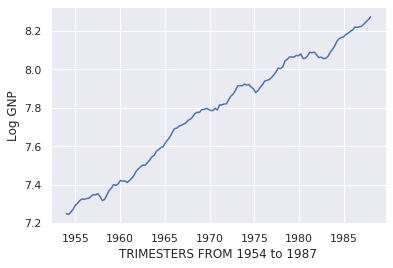

In [16]:
plt.plot(year, GNP_list) 
  
# naming the x axis 
plt.xlabel('TRIMESTERS FROM 1954 to 1987') 
# naming the y axis 
plt.ylabel('Log GNP') 

### Question 3 - What "stationnarity" means for a time series ?
Stationarity means that the statistical properties of a process generating a time series do not change over time. The algebraic equivalent is thus a linear function, perhaps the value of a linear function changes as 𝒙 grows, but the way it changes remains constant.

##### Strict Stationarity
A time series is said to be strictly stationary if all its observations are drawn from the same distribution: the joint probability does not change in time.
##### Weak Stationarity
We do not require that each draw comes from the exact same distribution, only that the distributions have the same mean and variance (all of them not a
function of time). 

The log(GNP) function does not look to be stationary as it takes increasing values, its mean value and its variance are not constant.


### Question 4 - Display the correlograms of the logGNP time series

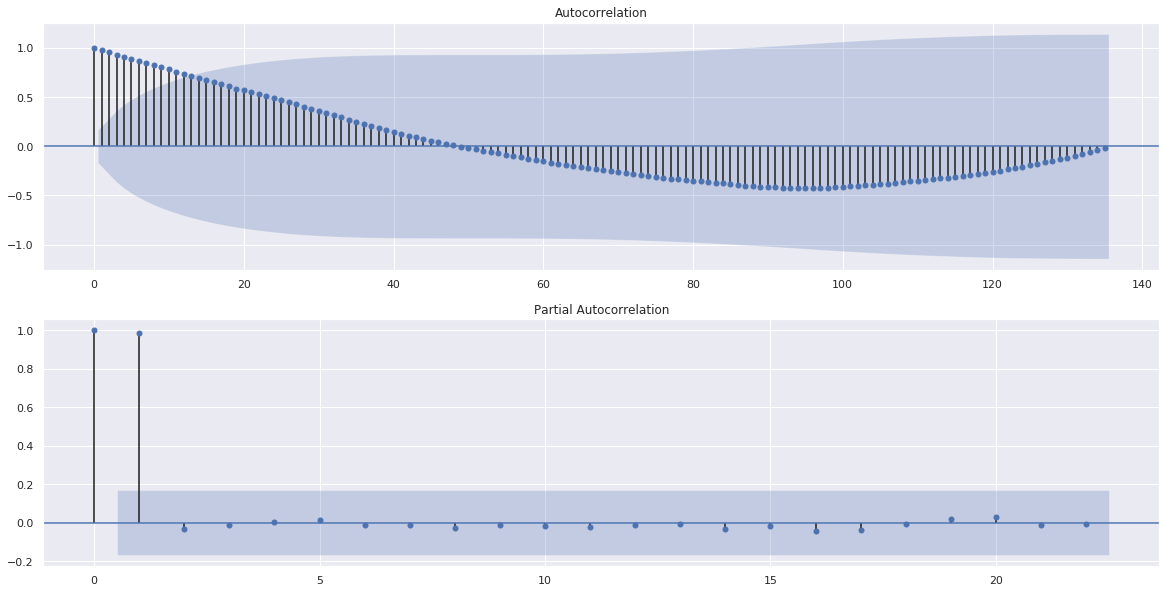

In [17]:
plt.figure(figsize=(20,10))
plt.subplot(211)
plot_acf(logGNP,ax=plt.gca(),lags=135)
plt.subplot(212)
plot_pacf(logGNP,ax=plt.gca())
plt.show()

On the ACF of the GNP only seven values which are relevant. The function may not be that much of autocorrelated. 

In [18]:
acorr_ljungbox(logGNP, lags=None, boxpierce=True)

(array([ 132.86571499,  260.51546901,  383.05213314,  500.6827811 ,
         613.68454203,  722.15376124,  826.17838831,  925.753287  ,
        1020.96905653, 1111.90022305, 1198.58439528, 1281.12840469,
        1359.68053827, 1434.23198343, 1504.86173482, 1571.52149153,
        1634.21160414, 1693.10712068, 1748.49284085, 1800.70117328,
        1849.85650277, 1896.08364314, 1939.27276875, 1979.51275283,
        2016.82543602, 2051.10767653, 2082.40617453, 2110.67987972,
        2136.13442806, 2158.95346101, 2179.28236679, 2197.18101717,
        2212.83404676, 2226.37246851, 2237.95431091, 2247.67130765,
        2255.68103261, 2262.18716737, 2267.3770597 , 2271.45517228]),
 array([9.67388306e-031, 2.69020069e-057, 1.03749143e-082, 4.76847496e-107,
        2.23332939e-130, 1.00664910e-152, 4.15724608e-174, 1.57141269e-194,
        5.18397688e-214, 1.43547856e-232, 3.26956827e-250, 5.80138345e-267,
        7.44155178e-283, 6.92356357e-298, 0.00000000e+000, 0.00000000e+000,
        0.0000

#### Comment

First of all, just as the exemple we saw in class : the ACF does not go down exponentially
which means that the series may need to be differentiated. And so this is what we are going
to do in the following questions.

We use the Box-Pierce test in order to assess if the series is mostly white noise.
We observe that the p value for this test is very close to zero. Therefore we can reject the
null hypothesis and conclude that this series is not composed white noise. This implies that
this time series is not stationary.

According to the previous results we conclude that this time series is not stationary.

<br/>
<br/>

# Exercice B - Study of DiffGNP
___
### Question 1 - Create a DiffGNP

In [19]:
DiffGNP = logGNP.diff()
DiffGNP_list = DiffGNP.tolist()
DiffGNP = DiffGNP.drop([0])

This new time serie represents the difference of GDP between two quarters and t-1 for any t
between Q2 of 1954 and Q3 of 1987.

### Question 2 - Plot the evolution of this series between 1954 and the 3rd semester of 1987

Text(0, 0.5, 'DiffGNP')

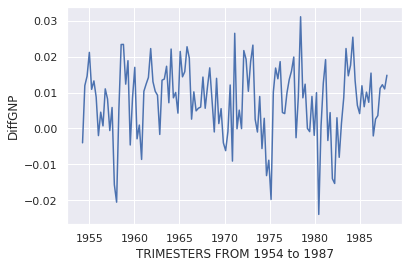

In [20]:
plt.plot(year, DiffGNP_list) 
  
# naming the x axis 
plt.xlabel('TRIMESTERS FROM 1954 to 1987') 
# naming the y axis 
plt.ylabel('DiffGNP') 

### Question 3 - Is this Series centered ?
In order to say if this series is centered or not we compute a Student Test that will also
provide us with the mean of the series.

In [21]:
vect_centered = np.linspace(0, 0, 136)
stats.ttest_ind(DiffGNP, vect_centered)

Ttest_indResult(statistic=8.706074014591564, pvalue=3.2338138725122526e-16)

The mean value of this time series is very close to zero. But the p value of the Student Test is
is almost zero, this means that we can reject the null hypothesis. Therefore the true mean
value is different from zero and the series is not centered.

### Question 4 - Use the plot_acf and plot_pacf

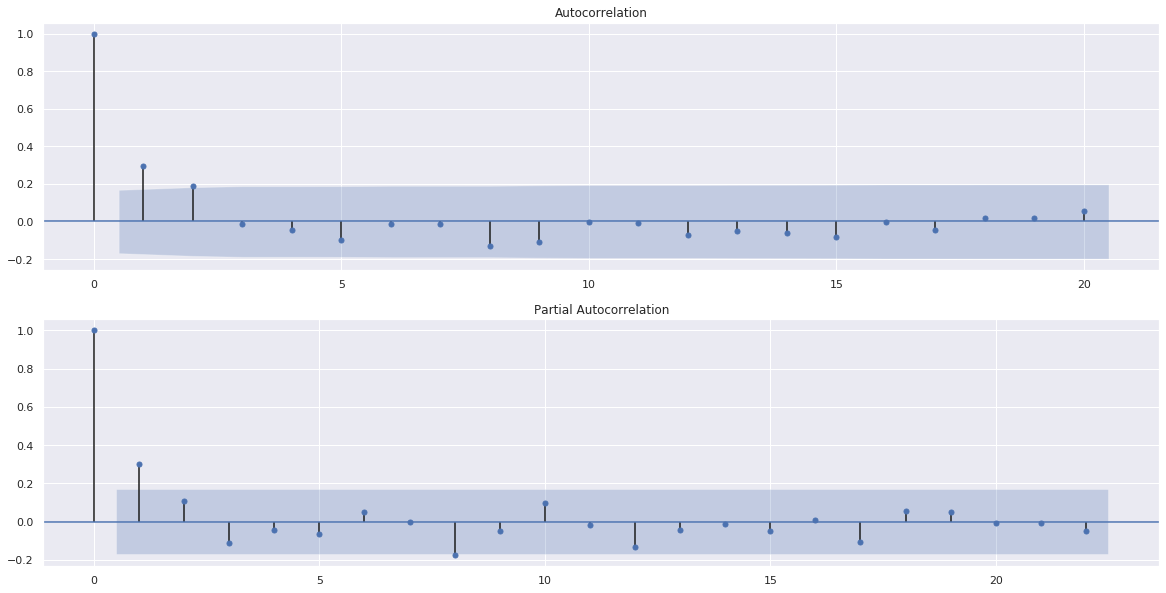

In [22]:
plt.figure(figsize=(20,10))
plt.subplot(211)
plot_acf(DiffGNP,ax=plt.gca(),lags=20)
plt.subplot(212)
plot_pacf(DiffGNP,ax=plt.gca())
plt.show()

#### Deduce the most likely parameter(s) p and q for an ARMA(p,q) model to modelise DiffGNP

From  ACF , we have 1 and 2
<br>
From  PACF, we have 1 and 8. 

### Question 5. Test all the couples (p,q) that seemed relevant to you

In [23]:
size = int(len(logGNP) * 0.7)
train= logGNP[0:size]
test = logGNP[size:len(logGNP)]

def modelFit(p,q):
    model = ARIMA(train, order=(p,1,q))
    return model.fit()

#ARMA(1,1)
model11 = modelFit(1,1)

#ARMA(1,2)
model12 = modelFit(1,2)

#ARMA(8,1)
model81 = modelFit(8,1)

#ARMA(8,2)
model82 = modelFit(8,2)

#### Efficiency of our models - model.summary()
Quality of the model indicators :
- AIC (Akaike Information Criterion) ; we look for the lowest value possible.

- BIC (Bayesian Information Criterion ; with more penalty based on the number of parameters used. We look for the lowest value possible.

- Log Likelihood ; This time, we will look for the highest value possible. However, AICs and BICs are more reliable, therefore they will be prioritized over Log likelihood.

#### Model(1,1) :

In [24]:
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.log.GNP.   No. Observations:                   94
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 305.072
Method:                       css-mle   S.D. of innovations              0.009
Date:                Thu, 05 Dec 2019   AIC                           -602.144
Time:                        22:47:48   BIC                           -591.971
Sample:                             1   HQIC                          -598.035
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0081      0.001      5.385      0.000       0.005       0.011
ar.L1.D.log.GNP.     0.4607      0.205      2.248      0.027       0.059       0.862
ma.L1.D.log.GNP.    -0.1619      0.215     -0.752      0.454      -0.584       0.260
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.1707           +0.0000j            2.1707            0.0000
MA.1            6.1776           +0.0000j            6.1776            0.0000
-----------------------------------------------------------------------------
"""

#### Model(1,2) : 

In [25]:
model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.log.GNP.   No. Observations:                   94
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 306.047
Method:                       css-mle   S.D. of innovations              0.009
Date:                Thu, 05 Dec 2019   AIC                           -602.095
Time:                        22:47:48   BIC                           -589.378
Sample:                             1   HQIC                          -596.958
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0081      0.002      5.327      0.000       0.005       0.011
ar.L1.D.log.GNP.     0.1804      0.327      0.552      0.582      -0.460       0.821
ma.L1.D.log.GNP.     0.1043      0.321      0.325      0.746      -0.524       0.733
ma.L2.D.log.GNP.     0.1937      0.114      1.705      0.092      -0.029       0.416
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            5.5427           +0.0000j            5.5427            0.0000
MA.1           -0.2691           -2.2559j            2.2719           -0.2689
MA.2           -0.2691           +2.2559j            2.2719            0.2689
-----------------------------------------------------------------------------
"""

#### Model(8,1) : 

In [26]:
model81.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.log.GNP.   No. Observations:                   94
Model:                 ARIMA(8, 1, 1)   Log Likelihood                 309.378
Method:                       css-mle   S.D. of innovations              0.009
Date:                Thu, 05 Dec 2019   AIC                           -596.756
Time:                        22:47:48   BIC                           -568.780
Sample:                             1   HQIC                          -585.456
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0079      0.001      8.146      0.000       0.006       0.010
ar.L1.D.log.GNP.     0.7420      0.340      2.182      0.032       0.076       1.408
ar.L2.D.log.GNP.     0.0464      0.159      0.291      0.771      -0.265       0.358
ar.L3.D.log.GNP.    -0.1942      0.133     -1.458      0.149      -0.455       0.067
ar.L4.D.log.GNP.    -0.0277      0.132     -0.210      0.834      -0.286       0.230
ar.L5.D.log.GNP.    -0.1122      0.128     -0.876      0.383      -0.363       0.139
ar.L6.D.log.GNP.     0.1888      0.129      1.461      0.148      -0.065       0.442
ar.L7.D.log.GNP.     0.0246      0.133      0.185      0.854      -0.236       0.285
ar.L8.D.log.GNP.    -0.1802      0.104     -1.725      0.088      -0.385       0.025
ma.L1.D.log.GNP.    -0.4742      0.338     -1.404      0.164      -1.136       0.188
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0933           -0.3860j            1.1595           -0.0540
AR.2            1.0933           +0.3860j            1.1595            0.0540
AR.3            0.7132           -0.9355j            1.1764           -0.1463
AR.4            0.7132           +0.9355j            1.1764            0.1463
AR.5           -0.4145           -1.1774j            1.2482           -0.3039
AR.6           -0.4145           +1.1774j            1.2482            0.3039
AR.7           -1.3239           -0.4017j            1.3835           -0.4531
AR.8           -1.3239           +0.4017j            1.3835            0.4531
MA.1            2.1089           +0.0000j            2.1089            0.0000
-----------------------------------------------------------------------------
"""

#### Model(8,2) : 

In [27]:
model82.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.log.GNP.   No. Observations:                   94
Model:                 ARIMA(8, 1, 2)   Log Likelihood                 309.379
Method:                       css-mle   S.D. of innovations              0.009
Date:                Thu, 05 Dec 2019   AIC                           -594.759
Time:                        22:47:48   BIC                           -564.239
Sample:                             1   HQIC                          -582.431
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0080      0.001      6.608      0.000       0.006       0.010
ar.L1.D.log.GNP.     1.2725      0.111     11.440      0.000       1.054       1.491
ar.L2.D.log.GNP.    -1.0442      0.170     -6.133      0.000      -1.378      -0.710
ar.L3.D.log.GNP.     0.0031      0.197      0.016      0.988      -0.384       0.390
ar.L4.D.log.GNP.     0.1798      0.196      0.918      0.361      -0.204       0.564
ar.L5.D.log.GNP.    -0.1631      0.196     -0.832      0.408      -0.547       0.221
ar.L6.D.log.GNP.     0.1794      0.197      0.912      0.364      -0.206       0.565
ar.L7.D.log.GNP.    -0.1849      0.173     -1.070      0.288      -0.524       0.154
ar.L8.D.log.GNP.     0.0280      0.108      0.260      0.796      -0.183       0.239
ma.L1.D.log.GNP.    -1.0344      0.046    -22.292      0.000      -1.125      -0.943
ma.L2.D.log.GNP.     1.0000      0.048     20.648      0.000       0.905       1.095
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.5353           -0.8490j            1.0037           -0.1605
AR.2            0.5353           +0.8490j            1.0037            0.1605
AR.3           -1.3750           -0.0000j            1.3750           -0.5000
AR.4           -0.5431           -1.4355j            1.5349           -0.3076
AR.5           -0.5431           +1.4355j            1.5349            0.3076
AR.6            1.1891           -0.7317j            1.3962           -0.0878
AR.7            1.1891           +0.7317j            1.3962            0.0878
AR.8            5.6172           -0.0000j            5.6172           -0.0000
MA.1            0.5172           -0.8559j            1.0000           -0.1635
MA.2            0.5172           +0.8559j            1.0000            0.1635
-----------------------------------------------------------------------------
"""

### Question 6 -  Which model is the best ?
Looking at the log likelihood results, we select first (8,1) and (2,1) because (8,1) has a greater log likelihood than (8,1). But if now look at aic, we will select (2,1) because of its small coefficient.
Finally, we conclude that (8,1) seems to be the better model due to its highest log likelihood correlation coefficient and to its small aic coefficient.

We conclude that (8,1) seems to be the better model due to its highest log likelihood correlation coefficient and to its small aic coefficient.

### Question 7 - Plot the predictions of your models alongside the expected results.

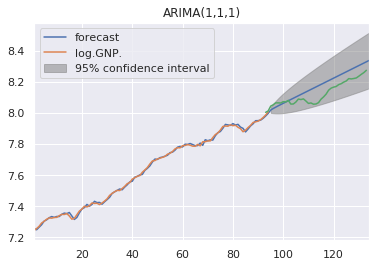

In [28]:
model11.plot_predict(1,134)
plt.plot([i for i in range(93,134)],test, label='test')
plt.title('ARIMA(1,1,1)')
plt.show()

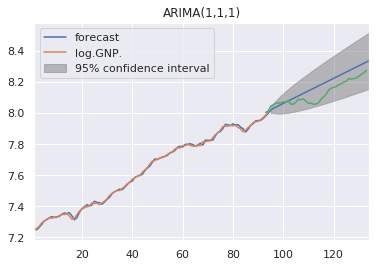

In [29]:
model12.plot_predict(1,134)
plt.plot([i for i in range(93,134)],test, label='test')
plt.title('ARIMA(1,1,1)')
plt.show()

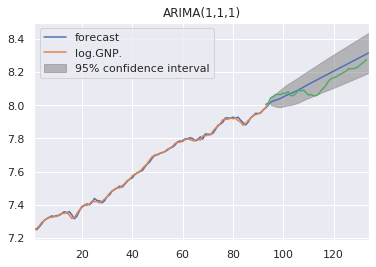

In [30]:
model81.plot_predict(1,134)
plt.plot([i for i in range(93,134)],test, label='test')
plt.title('ARIMA(1,1,1)')
plt.show()

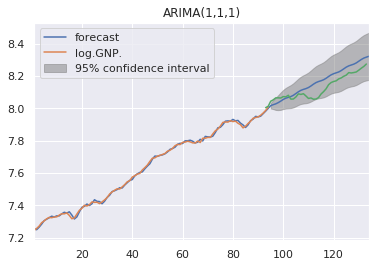

In [31]:
model82.plot_predict(1,134)
plt.plot([i for i in range(93,134)],test, label='test')
plt.title('ARIMA(1,1,1)')
plt.show()

### Question 8 - Use the Box-Pierce test and the Shapiro-Wilk test
We are now going to study 3 models in particular: ARMA(1,1), ARMA(1,2) and ARMA(8,2). 

We remind you that the Shapiro-Wilk test assesses the null hypothesis that a sample follows a normal distribution.

In [32]:
size = int(len(logGNP) * 0.7)
train= logGNP[0:size]
test = logGNP[size:len(logGNP)]

def getResid(p,q):
    model = ARIMA(train, order=(p,1,q))
    model_fit = model.fit()
    return model_fit.resid

modelresids11 = getResid(1,1)
modelresids21 = getResid(2,1)
modelresids82 = getResid(8,2)
print("p-value for residual of ARIMA(1,1,1) is : ")
print(acorr_ljungbox(modelresids11, boxpierce=True)[3][1])
print("p-value for residual of ARIMA(1,1,2) is : ")
print(acorr_ljungbox(modelresids21, boxpierce=True)[3][1])
print("p-value for residual of ARIMA(1,8,2) is : ")
print(acorr_ljungbox(modelresids82, boxpierce=True)[3][1])

p-value for residual of ARIMA(1,1,1) is : 
0.5900759299533245
p-value for residual of ARIMA(1,1,2) is : 
0.9679635621923905
p-value for residual of ARIMA(1,8,2) is : 
0.997647498428927


We can’t reject the initial hypothesis (values superior than 0,5). 

Therefore, we can affirm that residuals are stationary.

<br/>
<br/>

# Exercice C - ARIMA GNP
___
### Create a DiffGNP

In [33]:
Diff2GNP = DiffGNP.diff()
Diff2GNP = Diff2GNP.drop([1])

year = np.linspace(1954, 1987.75, len(logGNP)-2)

### Plot the evolution of this series between 1954 and the 3rd semester of 1987

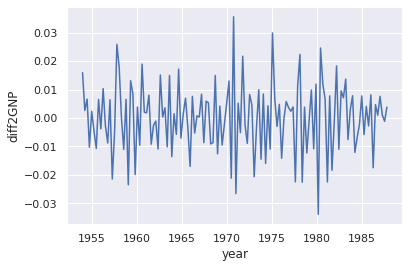

In [34]:
plt.plot(year, Diff2GNP)
plt.ylabel('diff2GNP')
plt.xlabel('year')
plt.show()

### Is this Series centered ?
In order to say if this series is centered or not we compute a Student Test that will also
provide us with the mean of the series.

In [35]:
mean_diff2GNP = Diff2GNP.mean(axis = 0)
null_vector = np.linspace(0, 0, len(Diff2GNP))

print(mean_diff2GNP)
print(stats.ttest_ind(Diff2GNP, null_vector))

0.00014034311800842938
Ttest_indResult(statistic=0.1348076752039927, pvalue=0.8928658857856732)


The mean value of this time series is very close to zero. But the p value of the Student Test is
is almost zero, this means that we can reject the null hypothesis. Therefore the true mean
value is different from zero and the series is not centered.
### Use the plot_acf and plot_pacf

2      0.015907
3      0.002644
4      0.006619
5     -0.010285
6      0.002343
         ...   
131    0.000984
132    0.007589
133    0.001002
134   -0.001181
135    0.003814
Name: log.GNP., Length: 134, dtype: float64


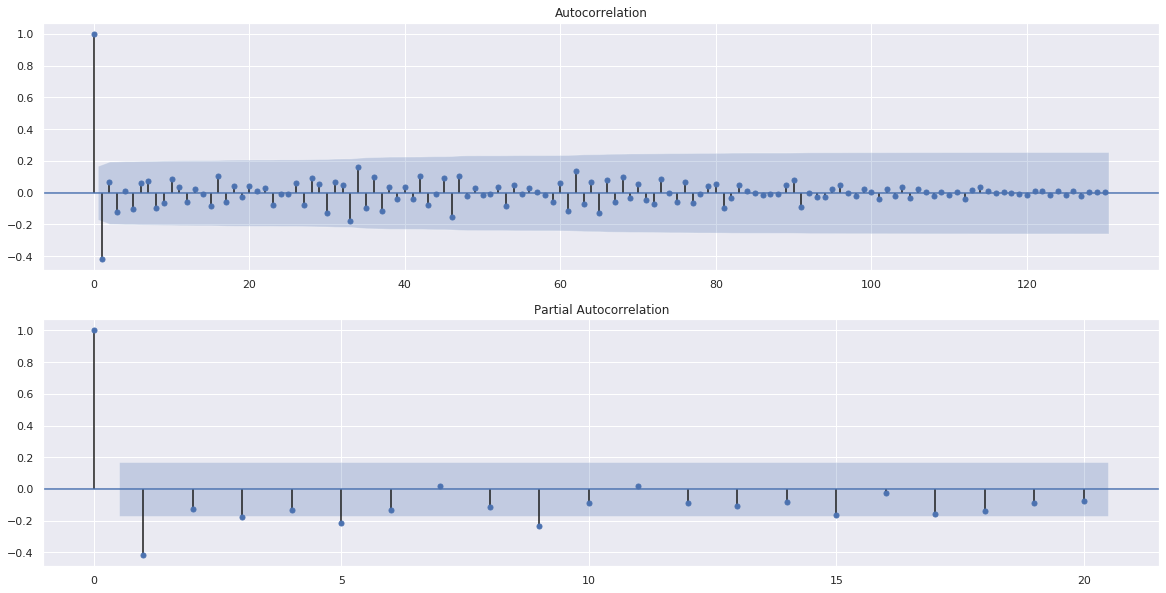

In [36]:
print(Diff2GNP)

plt.figure(figsize=(20,10))
plt.subplot(211)
plot_acf(Diff2GNP,ax=plt.gca(), lags=130)
plt.subplot(212)
plot_pacf(Diff2GNP,ax=plt.gca(), lags=20)
plt.show()

#### Deduce the most likely parameter(s) p and q for an ARMA(p,q) model to modelise DiffGNP

From  ACF and PACF we have four couples : (1,1) , (9,1) , (3,1) , (5,1)

### Test all the couples (p,q) that seemed relevant to you

In [44]:
diffLogGNP = np.diff(logGNP)

In [55]:
size = int(len(diffLogGNP * 0.7))
train = diffLogGNP[0:size]
test = diffLogGNP[size:len(np.diff(logGNP))]

def modelFit(p,q):
    model = ARIMA(train, order=(p,2,q))
    return model.fit()

#ARMA(1,1)
model11 = modelFit(1,1)

#ARMA(3,1)
model31 = modelFit(3,1)

#ARMA(5,1)
model51 = modelFit(5,1)

#ARMA(9,1)
model91 = modelFit(9,1)

#### Model(1,1) :

In [56]:
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                  133
Model:                 ARIMA(1, 2, 1)   Log Likelihood                 408.121
Method:                       css-mle   S.D. of innovations              0.011
Date:                Thu, 05 Dec 2019   AIC                           -808.241
Time:                        22:54:23   BIC                           -796.680
Sample:                             2   HQIC                          -803.543
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.625e-07   2.54e-05     -0.014      0.989   -5.02e-05    4.95e-05
ar.L1.D2.y    -0.4177      0.079     -5.286      0.000      -0.573      -0.263
ma.L1.D2.y    -0.9748      0.040    -24.642      0.000      -1.052      -0.897
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.3939           +0.0000j            2.3939            0.5000
MA.1            1.0259           +0.0000j            1.0259            0.0000
-----------------------------------------------------------------------------
"""

#### Model(3,1) : 

In [57]:
model31.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                  133
Model:                 ARIMA(3, 2, 1)   Log Likelihood                 411.835
Method:                       css-mle   S.D. of innovations              0.011
Date:                Thu, 05 Dec 2019   AIC                           -811.671
Time:                        22:54:31   BIC                           -794.329
Sample:                             2   HQIC                          -804.624
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.823e-07    1.3e-05      0.068      0.946   -2.45e-05    2.63e-05
ar.L1.D2.y    -0.4914      0.086     -5.701      0.000      -0.660      -0.322
ar.L2.D2.y    -0.2118      0.095     -2.235      0.027      -0.398      -0.026
ar.L3.D2.y    -0.1702      0.086     -1.987      0.049      -0.338      -0.002
ma.L1.D2.y    -0.9988      0.019    -51.561      0.000      -1.037      -0.961
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6511           -0.0000j            1.6511           -0.5000
AR.2            0.2033           -1.8754j            1.8864           -0.2328
AR.3            0.2033           +1.8754j            1.8864            0.2328
MA.1            1.0012           +0.0000j            1.0012            0.0000
-----------------------------------------------------------------------------
"""

#### Model(5,1) : 

In [58]:
model51.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                  133
Model:                 ARIMA(5, 2, 1)   Log Likelihood                 415.763
Method:                       css-mle   S.D. of innovations              0.010
Date:                Thu, 05 Dec 2019   AIC                           -815.526
Time:                        22:54:34   BIC                           -792.404
Sample:                             2   HQIC                          -806.130
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.199e-06   9.12e-06      0.131      0.896   -1.67e-05    1.91e-05
ar.L1.D2.y    -0.5590      0.086     -6.538      0.000      -0.727      -0.391
ar.L2.D2.y    -0.3072      0.096     -3.192      0.002      -0.496      -0.119
ar.L3.D2.y    -0.3029      0.096     -3.156      0.002      -0.491      -0.115
ar.L4.D2.y    -0.2436      0.096     -2.547      0.012      -0.431      -0.056
ar.L5.D2.y    -0.2086      0.085     -2.466      0.015      -0.374      -0.043
ma.L1.D2.y    -1.0000      0.020    -50.293      0.000      -1.039      -0.961
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.7750           -1.0798j            1.3291           -0.1509
AR.2            0.7750           +1.0798j            1.3291            0.1509
AR.3           -1.3219           -0.0000j            1.3219           -0.5000
AR.4           -0.6979           -1.2513j            1.4328           -0.3310
AR.5           -0.6979           +1.2513j            1.4328            0.3310
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

#### Model(9,1) : 

In [59]:
model82.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.log.GNP.   No. Observations:                   94
Model:                 ARIMA(8, 1, 2)   Log Likelihood                 309.379
Method:                       css-mle   S.D. of innovations              0.009
Date:                Thu, 05 Dec 2019   AIC                           -594.759
Time:                        22:54:44   BIC                           -564.239
Sample:                             1   HQIC                          -582.431
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0080      0.001      6.608      0.000       0.006       0.010
ar.L1.D.log.GNP.     1.2725      0.111     11.440      0.000       1.054       1.491
ar.L2.D.log.GNP.    -1.0442      0.170     -6.133      0.000      -1.378      -0.710
ar.L3.D.log.GNP.     0.0031      0.197      0.016      0.988      -0.384       0.390
ar.L4.D.log.GNP.     0.1798      0.196      0.918      0.361      -0.204       0.564
ar.L5.D.log.GNP.    -0.1631      0.196     -0.832      0.408      -0.547       0.221
ar.L6.D.log.GNP.     0.1794      0.197      0.912      0.364      -0.206       0.565
ar.L7.D.log.GNP.    -0.1849      0.173     -1.070      0.288      -0.524       0.154
ar.L8.D.log.GNP.     0.0280      0.108      0.260      0.796      -0.183       0.239
ma.L1.D.log.GNP.    -1.0344      0.046    -22.292      0.000      -1.125      -0.943
ma.L2.D.log.GNP.     1.0000      0.048     20.648      0.000       0.905       1.095
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.5353           -0.8490j            1.0037           -0.1605
AR.2            0.5353           +0.8490j            1.0037            0.1605
AR.3           -1.3750           -0.0000j            1.3750           -0.5000
AR.4           -0.5431           -1.4355j            1.5349           -0.3076
AR.5           -0.5431           +1.4355j            1.5349            0.3076
AR.6            1.1891           -0.7317j            1.3962           -0.0878
AR.7            1.1891           +0.7317j            1.3962            0.0878
AR.8            5.6172           -0.0000j            5.6172           -0.0000
MA.1            0.5172           -0.8559j            1.0000           -0.1635
MA.2            0.5172           +0.8559j            1.0000            0.1635
-----------------------------------------------------------------------------
"""

### Question 6 -  Which model is the best ?
Looking at the log likelihood results, we select first (8,1) and (2,1) because (8,1) has a greater log likelihood than (8,1). But if now look at aic, we will select (2,1) because of its small coefficient.
Finally, we conclude that (8,1) seems to be the better model due to its highest log likelihood correlation coefficient and to its small aic coefficient.

We conclude that (8,1) seems to be the better model due to its highest log likelihood correlation coefficient and to its small aic coefficient.

### Question 7 - Plot the predictions of your models alongside the expected results.

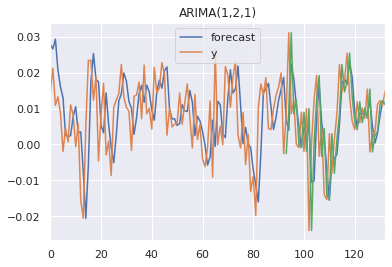

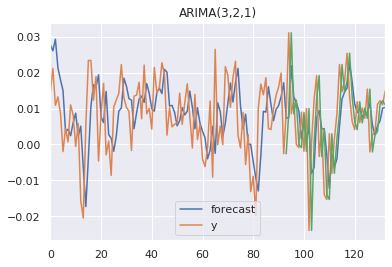

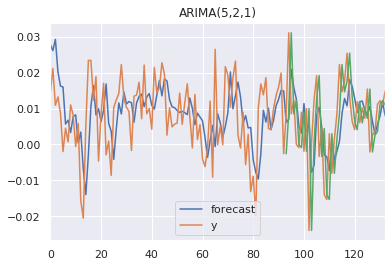

In [65]:
model11.plot_predict(2,134)
plt.plot([i for i in range(93,134)],test, label='test')
plt.title('ARIMA(1,2,1)')
plt.show()
model31.plot_predict(2,134)
plt.plot([i for i in range(93,134)],test, label='test')
plt.title('ARIMA(3,2,1)')
plt.show()
model51.plot_predict(2,134)
plt.plot([i for i in range(93,134)],test, label='test')
plt.title('ARIMA(5,2,1)')
plt.show()

In [ ]:
model31.plot_predict(1,134)
plt.plot([i for i in range(93,134)],test, label='test')
plt.title('ARIMA(1,1,1)')
plt.show()

In [ ]:
model81.plot_predict(1,134)
plt.plot([i for i in range(93,134)],test, label='test')
plt.title('ARIMA(1,1,1)')
plt.show()

In [ ]:
model82.plot_predict(1,134)
plt.plot([i for i in range(93,134)],test, label='test')
plt.title('ARIMA(1,1,1)')
plt.show()

### Question 8 - Use the Box-Pierce test and the Shapiro-Wilk test
We are now going to study 3 models in particular: ARMA(1,1), ARMA(1,2) and ARMA(8,2). 

We remind you that the Shapiro-Wilk test assesses the null hypothesis that a sample follows a normal distribution.

In [64]:
size = int(len(diffLogGNP) * 0.7)
train= diffLogGNP[0:size]
test = diffLogGNP[size:len(diffLogGNP)]

def getResid(p,q):
    model = ARIMA(train, order=(p,1,q))
    model_fit = model.fit()
    return model_fit.resid

modelresids11 = getResid(1,1)
modelresids31 = getResid(3,1)
modelresids51 = getResid(5,1)
print("p-value for residual of ARIMA(1,1,1) is : ")
print(acorr_ljungbox(modelresids11, boxpierce=True)[3][1])
print("p-value for residual of ARIMA(1,1,2) is : ")
print(acorr_ljungbox(modelresids31, boxpierce=True)[3][1])
print("p-value for residual of ARIMA(1,8,2) is : ")
print(acorr_ljungbox(modelresids51, boxpierce=True)[3][1])

p-value for residual of ARIMA(1,1,1) is : 
0.30915084876455373
p-value for residual of ARIMA(1,1,2) is : 
0.9983483960225781
p-value for residual of ARIMA(1,8,2) is : 
0.9680203704228205
